#### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem, DataStructs, PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from deepchem import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from deepchem import metrics
import deepchem as dc

#### Read in the preprocessed BBB dataset from Adenot paper

In [2]:
bbb_df = pd.read_csv('adenot_processed.csv')

In [3]:
bbb_df

,Drug,SMILES,permeable,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ACEBUTOLOL,CCCC(=O)Nc1ccc(c(c1)C(C)=O)OCC(O)CNC(C)C,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,DACTINOMYCIN,CC(C)[C@H]1NC(=O)[C@@H](NC(=O)c2ccc(c3c2N=C2C(...,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,ALDOSTERONE,C[C@@]12CCC(=O)C=C2CC[C@H]2C3CC[C@H](C(=O)CO)C...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,AMILORIDE,N\C(=N)\NC(=O)c1nc(c(nc1N)N)Cl,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AMIODARONE,CCCCc1oc2ccccc2c1C(=O)c1cc(c(c(c1)[I])OCCN(CC)...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,AMITRIPTYLINE,CN(C)CCC=C1c2ccccc2CCc2ccccc12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1656,CHLORPROMAZINE,CN(C)CCCN1c2ccccc2Sc2ccc(cc12)Cl,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1657,DISULFIRAM,CCN(CC)C(=S)SSC(=S)N(CC)CC,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1658,MORPHINE,CN1CC[C@@]23[C@H]4Oc5c(ccc(c52)C[C@@H]1[C@@H]3...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
bbb_df[bbb_df['permeable']==1]

,Drug,SMILES,permeable,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
341,ADENOSYL-METHIONINE,C[S+](CC[C@H](N)C([O-])=O)C[C@H]1O[C@H]([C@H](...,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
342,ACEGLUTAMIDE,CC(=O)N[C@@H](CCC(N)=O)C(O)=O,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
343,ATROMEPINE,CN1C2CCC1CC(C2)OC(=O)C(C)(CO)c1ccccc1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
344,ATROPINE,CN1[C@@H]2CC[C@H]1CC(C2)OC(=O)C(CO)c1ccccc1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
345,BENZATROPINE,CN1[C@H]2CC[C@@H]1CC(C2)OC(c1ccccc1)c1ccccc1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,AMITRIPTYLINE,CN(C)CCC=C1c2ccccc2CCc2ccccc12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1656,CHLORPROMAZINE,CN(C)CCCN1c2ccccc2Sc2ccc(cc12)Cl,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1657,DISULFIRAM,CCN(CC)C(=S)SSC(=S)N(CC)CC,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1658,MORPHINE,CN1CC[C@@]23[C@H]4Oc5c(ccc(c52)C[C@@H]1[C@@H]3...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
bbb_df.head(0)

,Drug,SMILES,permeable,0,1,2,3,4,5,6,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


## Random Split

#### Data preprocessing

In [6]:
X = bbb_df.iloc[:,3:].copy()
y = bbb_df.iloc[:,2].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Random Forest

In [7]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=20, random_state=0)

# Train the model using the training sets
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#### Hyperparameter Optimization

In [8]:
param_grid = ParameterGrid({'n_estimators': np.arange(50, 201, 50),
         'criterion': ['gini', 'entropy'],
         'max_depth': np.arange(5, 21, 5)
         })
accuracy = []
for params in param_grid: 
    rf = RandomForestClassifier(random_state=0, **params).fit(X_train, y_train)
    # Predict the response for test dataset
    y_pred = rf.predict(X_test)

    # Calculate how often the classifier is correct
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

acc_df = pd.DataFrame(param_grid)
acc_df['accuracy'] = accuracy
acc_df.sort_values(by='accuracy', ascending=False, inplace=True)
acc_df.head(10)

,criterion,max_depth,n_estimators,accuracy
12,gini,20,50,0.955823
14,gini,20,150,0.955823
30,entropy,20,150,0.953815
28,entropy,20,50,0.953815
15,gini,20,200,0.953815
13,gini,20,100,0.953815
24,entropy,15,50,0.951807
31,entropy,20,200,0.951807
29,entropy,20,100,0.951807
8,gini,15,50,0.949799


#### Optimized Random Forest

In [9]:
rf_best = RandomForestClassifier(random_state=0, n_estimators = 100, criterion='gini', max_depth=20)
rf_best.fit(X_train,y_train)
y_pred = rf_best.predict(X_test)

#### Feature Importances 

In [10]:
# You don't have to code anything here.

# get importance
dt_importance = rf_best.feature_importances_

# summarize and print out the feature importance
non_zero_index_list = [i for i, v in enumerate(dt_importance) if v != 0]

# remove all zero value entries
non_zero_feature_names = [bbb_df.iloc[:,3:].columns[i] for i in non_zero_index_list]
non_zero_importance = [dt_importance[i] for i in non_zero_index_list]
non_zero_feature_names_str = [str(x) for x in non_zero_feature_names]
feature_importance = pd.DataFrame(list(zip(non_zero_feature_names_str, non_zero_importance)), columns =['Feature','Importance'])
feature_importance.sort_values(by='Importance', ascending=True, inplace=True)

Text(0.5, 1.0, 'Top 10 Random Forest Feature Importances')

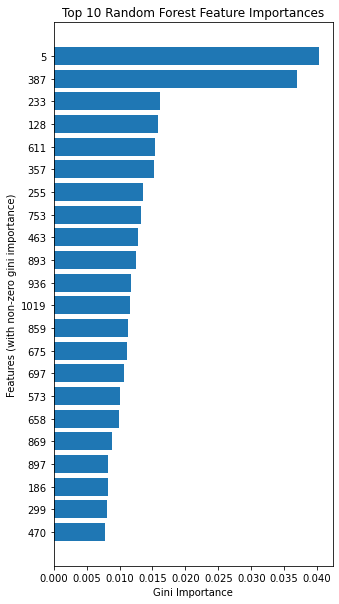

In [11]:
fig,ax = plt.subplots(figsize=(5,10))
plt.xlabel('Gini Importance')
plt.ylabel('Features (with non-zero gini importance)')
plt.barh(feature_importance['Feature'][958:], feature_importance['Importance'][958:])
plt.title('Top 10 Random Forest Feature Importances')

#### Visualize the proximity of features using the apply method of random forest.

In [12]:
temp_trees = rf_best.apply(X_train)
temp_trees

prox = np.array([[1-.0-scipy.spatial.distance.hamming(i,ii) for i in temp_trees] for ii in temp_trees])
1-prox

array([[0.  , 0.93, 0.91, ..., 0.93, 0.93, 0.93],
       [0.93, 0.  , 0.41, ..., 0.65, 0.43, 0.49],
       [0.91, 0.41, 0.  , ..., 0.61, 0.42, 0.44],
       ...,
       [0.93, 0.65, 0.61, ..., 0.  , 0.65, 0.7 ],
       [0.93, 0.43, 0.42, ..., 0.65, 0.  , 0.43],
       [0.93, 0.49, 0.44, ..., 0.7 , 0.43, 0.  ]])

In [13]:
X_embedded = TSNE(n_components=2, random_state=0, perplexity = 30).fit_transform(1-prox)

/opt/anaconda3/envs/bme590/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/bme590/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


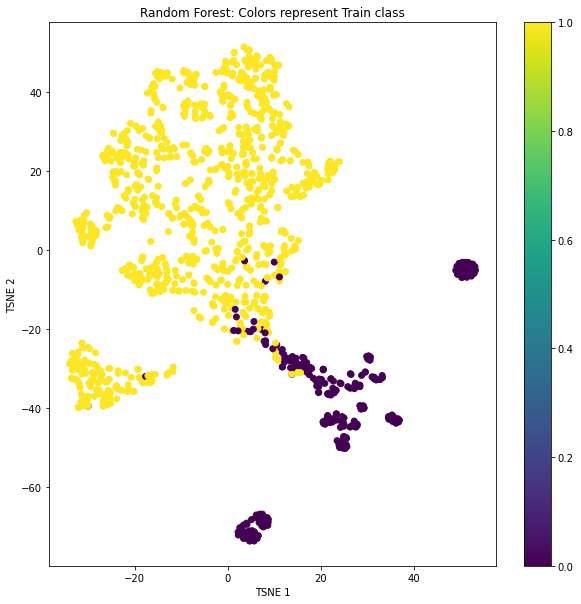

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_train)

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Random Forest: Colors represent Train class')
plt.colorbar()

#### Evaluation metrics

In [15]:
def plot_split(split, y_pred, y_test, t_components):
    
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('{} Split'.format(split))
    plt.subplot(1, 2, 1)
    plt.scatter(t_components[:,0], t_components[:,1], c=y_pred, s=10)
    plt.xlabel('t-SNE_1')
    plt.ylabel('t-SNE_2')
    plt.title('Prediction Visualization')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.scatter(t_components[:,0], t_components[:,1], c=y_test,s=10)
    plt.xlabel('t-SNE_1')
    plt.ylabel('t-SNE_2')
    plt.title('Permeability Visualization')
    plt.colorbar()
    
    # Calculate how often the classifier is correct
    print("{} Split Metrics:".format(split))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_pred))
    print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
    print("Precision Score:", metrics.precision_score(y_test, y_pred))
    print("Recall Score:", metrics.recall_score(y_test, y_pred))
    print("")

In [16]:
dim = 100
pca_rand = PCA(n_components=dim)
components_rand = pca_rand.fit_transform(X_test)
tsne_rand = TSNE(n_components=2)
t_components_rand = tsne_rand.fit_transform(components_rand)

/opt/anaconda3/envs/bme590/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/bme590/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Random Split Metrics:
Accuracy: 0.9538152610441767
Balanced Accuracy: 0.8826530612244898
ROC AUC: 0.8826530612244897
Precision Score: 0.9456264775413712
Recall Score: 1.0



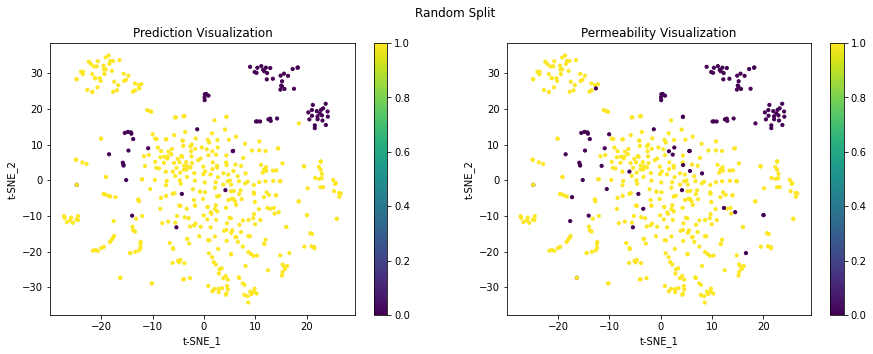

In [17]:
plot_split('Random', y_pred, y_test, t_components_rand)


### Scaffold Split 

#### Data preprocessing

In [18]:
Xs = bbb_df.iloc[:,3:].copy()
Ys = bbb_df.iloc[:,2].copy()
dataset = dc.data.DiskDataset.from_numpy(X=Xs,y=Ys,ids=bbb_df['SMILES'].tolist())
scaffoldsplitter = dc.splits.ScaffoldSplitter()
train_scaff, test_scaff = scaffoldsplitter.train_test_split(dataset)

In [19]:
# Train Decision Tree classifier
rf_best = rf_best.fit(train_scaff.X,train_scaff.y)

# Predict the response for test dataset
y_pred_scaff = rf_best.predict(test_scaff.X)

In [20]:
dim = 100
pca_scaff = PCA(n_components=dim)
components_scaff = pca_scaff.fit_transform(test_scaff.X)

In [21]:
tsne_scaff = TSNE(n_components=2)
t_components_scaff = tsne_scaff.fit_transform(components_scaff)

/opt/anaconda3/envs/bme590/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/bme590/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Scaffold Split Metrics:
Accuracy: 0.8012048192771084
Balanced Accuracy: 0.777027027027027
ROC AUC: 0.777027027027027
Precision Score: 0.736
Recall Score: 1.0



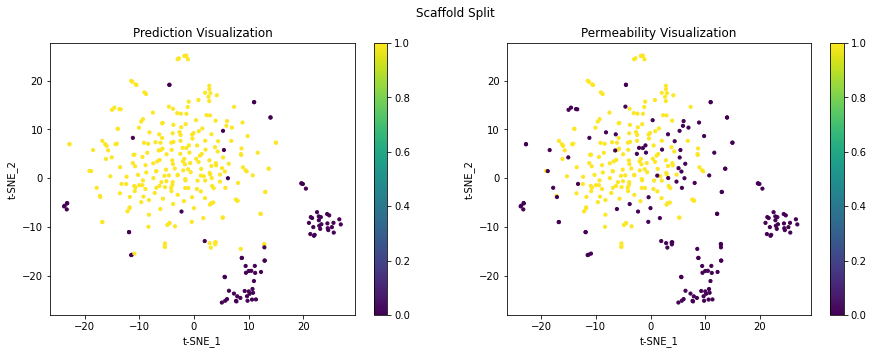

In [22]:
plot_split('Scaffold', y_pred_scaff, test_scaff.y, t_components_scaff)